# Pipeline analysis for unsupervised data
Let's start simple by analyzing the data from a single individual, considering: total distance, look-around, sniffing, inner-zone time, wall-climbing, and huddle. We start by importing the necessary packages and directories.

In [1]:
import os
import pandas as pd
import pickle
import deepof.data
import deepof.visuals
import visuals_customized
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Open an existing DeepOF project
directory_output = '//folder/becell/Lab Projects/ERCstG_HighMemory/Data/Marc/1) SOC/2024-01a02 cFos/'
my_deepof_project = deepof.data.load_project(directory_output + "deepof_tutorial_project")

In [3]:
# Open an existing supervised analysis
with open(directory_output + 'supervised_annotation.pkl', 'rb') as file:
    supervised_annotation = pickle.load(file)

In [4]:
# Load conditions
my_deepof_project.load_exp_conditions(directory_output + 'conditions.csv')

In [5]:
# Define colors
white = '#FFFFFF'
grey_soft = '#D3D3D3'
grey_stark = '#636466'
blue = '#194680'
red = '#801946'

## Plot silhouettes and UMAP

In [6]:
# Import trained models
with open(directory_output + 'new_silhouette_score_dict.pkl', 'rb') as file:
    new_silhouette_score_dict = pickle.load(file)

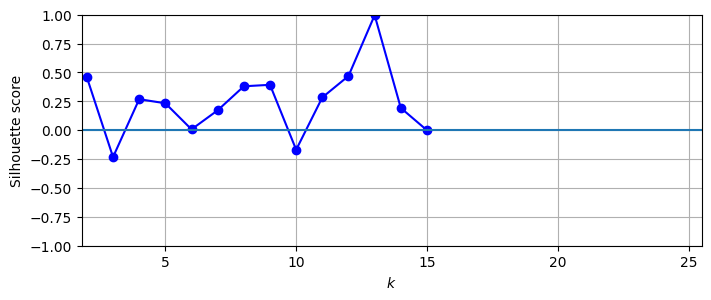

In [7]:
# Plot global silhouettes
visuals_customized.plot_silhouette_scores(new_silhouette_score_dict)

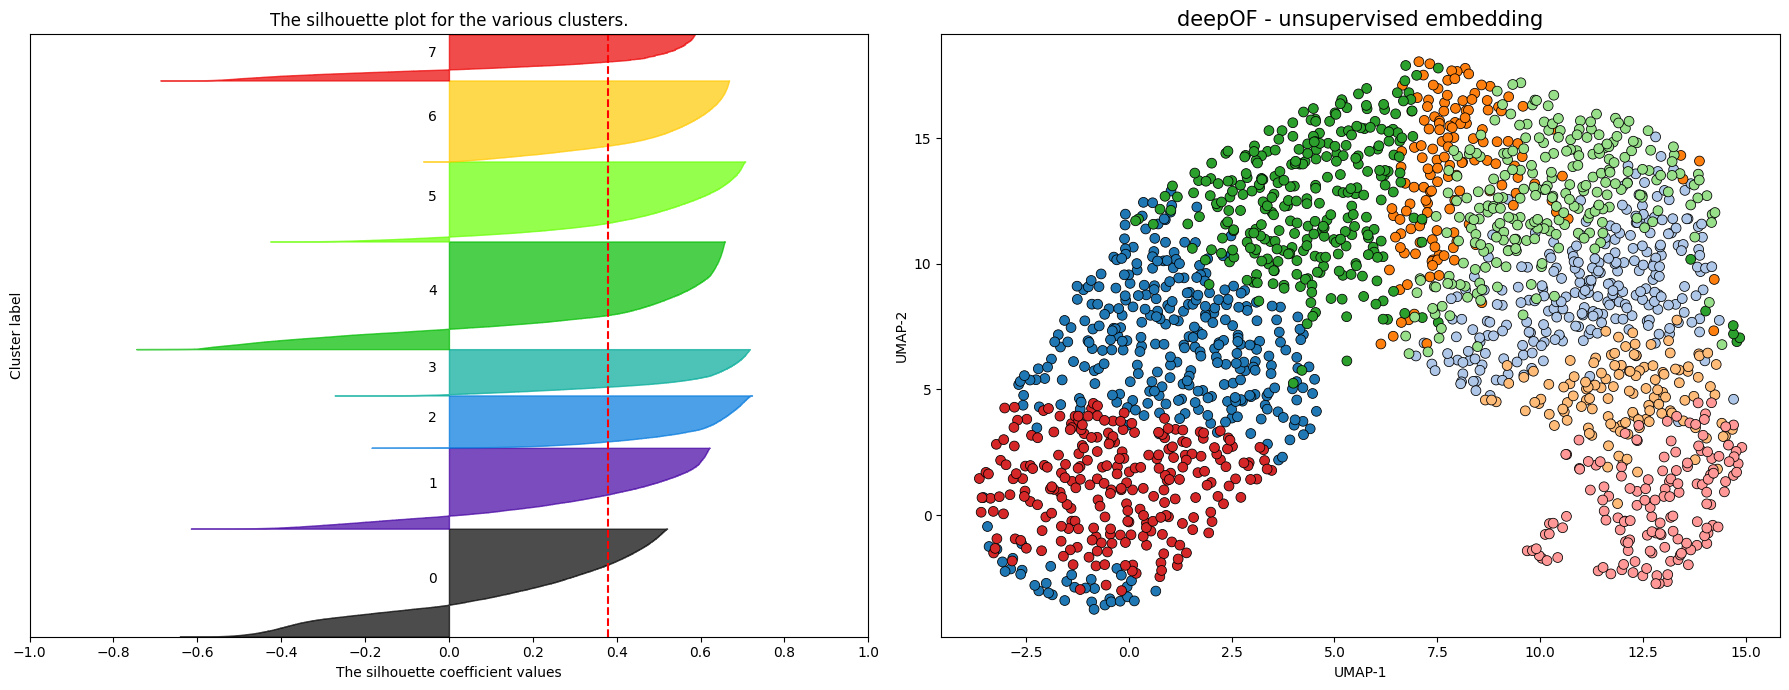

In [8]:
# Plot cluster silhouettes and UMAP
visuals_customized.silhouette_diagrams(new_silhouette_score_dict, my_deepof_project, [8])

In [7]:
num_clusters = 8
embeddings = new_silhouette_score_dict[num_clusters][3]
soft_counts = new_silhouette_score_dict[num_clusters][4]
breaks = new_silhouette_score_dict[num_clusters][5]

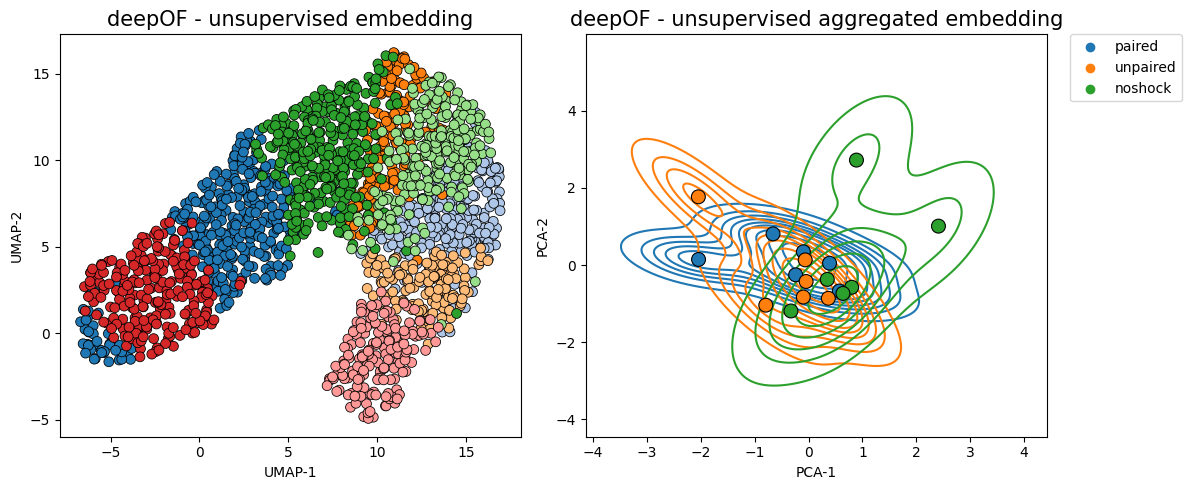

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    aggregate_experiments=False,
    samples=100,
    ax=ax1,
    save=False, # Set to True, or give a custom name, to save the plot
)

deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    aggregate_experiments="time on cluster", # Can also be set to 'mean' and 'median'
    exp_condition="protocol",
    show_aggregated_density=True,
    ax=ax2,
    save=False, # Set to True, or give a custom name, to save the plot,
)
ax2.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0
)

plt.tight_layout()
plt.show()

## Global separation dynamics
Next, let’s quantify the distance between our experimental distributions. To measure how far the behavior of stressed animals is from that of controls, we’ll use the **Wasserstein distance** between the distributions. Moreover, we’ll see how that distance evolves over time.

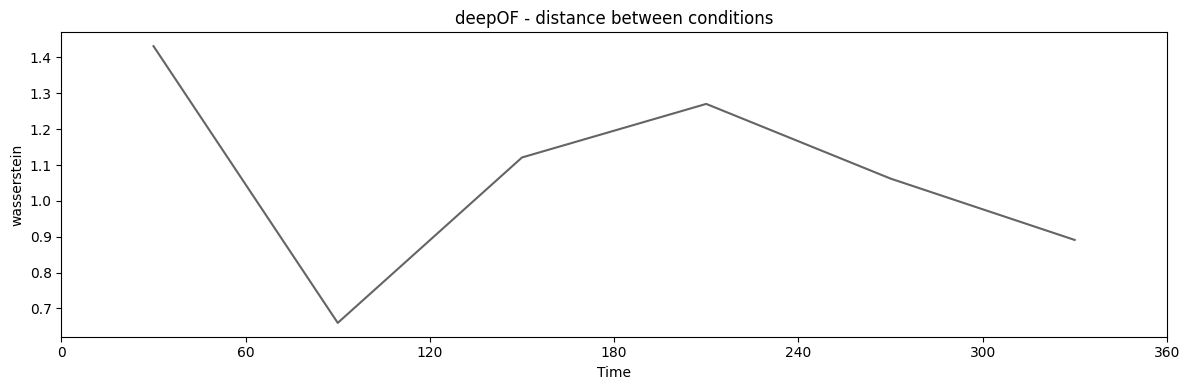

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

visuals_customized.plot_distance_between_conditions_custom(
    coordinates=my_deepof_project,
    embedding=embeddings,
    soft_counts=soft_counts,
    breaks=breaks,
    exp_condition="protocol",
    start_seconds_bin = 0,
    end_seconds_bin = 360,
    embedding_aggregation_method='median',
    distance_metric="wasserstein",
    n_jobs=1,
)

plt.show()

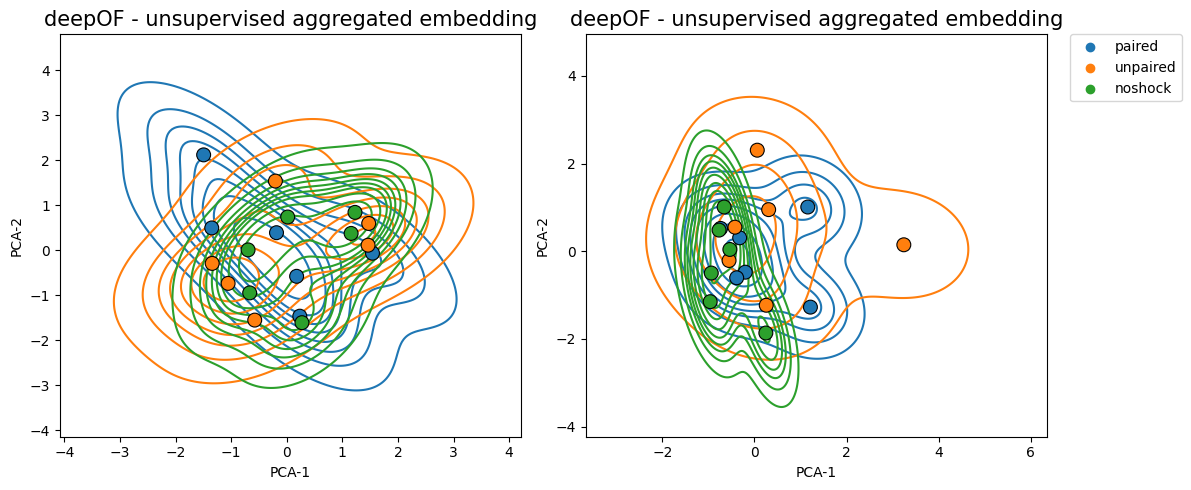

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    aggregate_experiments="time on cluster",
    bin_size=60,
    bin_index=1,
    ax=ax1,
)

deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    aggregate_experiments="time on cluster",
    exp_condition="protocol",
    show_aggregated_density=True,
    bin_size=60,
    bin_index=3,
    ax=ax2,
)


ax2.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0
)

ax1.legend().remove()
plt.tight_layout()
plt.show()

## Cluster enrichment

Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?


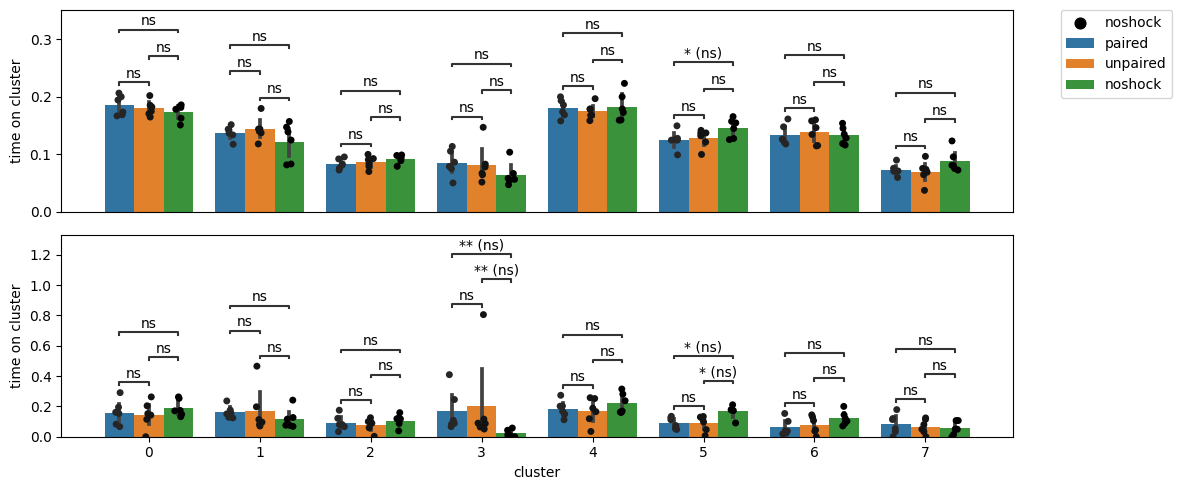

In [26]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 5))

deepof.visuals.plot_enrichment(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    normalize=True,
    add_stats="Mann-Whitney",
    exp_condition="protocol",
    verbose=False,
    ax=ax,
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    normalize=True,
    bin_size=30,
    bin_index=6,
    add_stats="Mann-Whitney",
    exp_condition="protocol",
    verbose=False,
    ax=ax2,
)
ax.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
ax.set_xlabel("")
ax2.legend().remove()
plt.title("")
plt.tight_layout()
plt.show()

## Cluster dynamics

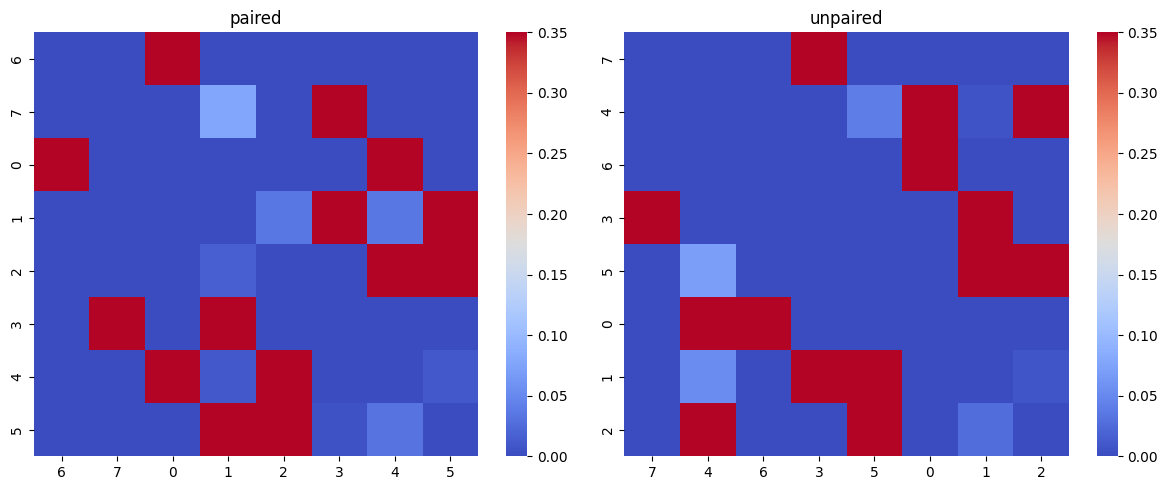

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Transition matrices and heatmaps
deepof.visuals.plot_transitions(
    my_deepof_project,
    embeddings.filter_videos(my_deepof_project.get_exp_conditions.keys()),
    soft_counts.filter_videos(my_deepof_project.get_exp_conditions.keys()),
    breaks.filter_videos(my_deepof_project.get_exp_conditions.keys()),
   # cluster=False,
    visualization="heatmaps",
    silence_diagonal=True,
    bin_size=60,
    bin_index=3,
    exp_condition="protocol",
    axes=axes,
)

plt.tight_layout()
plt.show()

invalid value encountered in divide


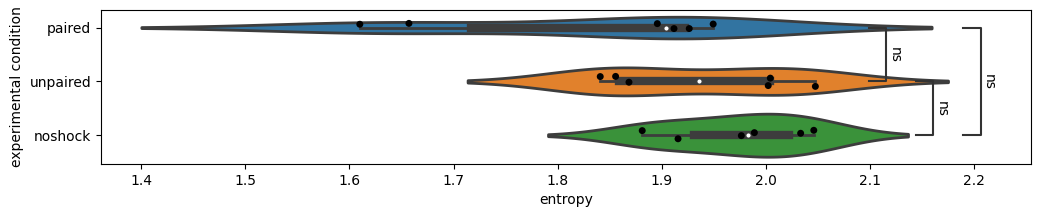

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))

deepof.visuals.plot_stationary_entropy(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    bin_size=60,
    bin_index=5,
    exp_condition="protocol",
    ax=ax,
)

## Cluster exploration

Mean of empty slice.
invalid value encountered in divide


RuntimeError: Requested MovieWriter (ffmpeg) not available

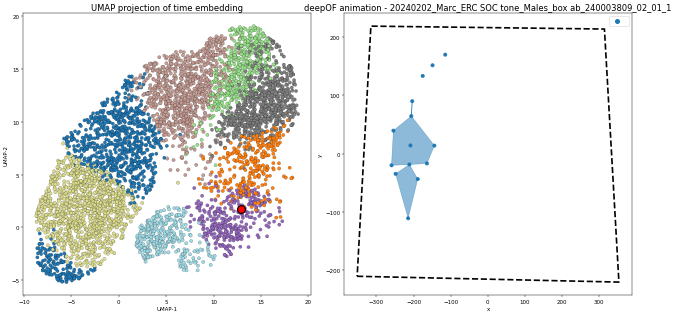

In [50]:
video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    embedding=embeddings,
    cluster_assignments=soft_counts,
    experiment_id="20240202_Marc_ERC SOC tone_Males_box ab_240003809_02_01_1",
    frame_limit=150,
    selected_cluster=3,
    dpi=40,
    center='arena',
)


In [ ]:
# Define the coordinates for the labels of each condition
coords_dict = {
    'hc_ind': ['name1', [4,5]],
    'hc_ee': ['name2', [4,5]],
    }

In [ ]:
# Define the colors for each condition
color_dict = {
    'hc_ind': sns.color_palette("Set1")[0],,
    'hc_ee': sns.color_palette("Set1")[1],
    }

In [ ]:
ax, embedding_dataset, rotated_loading_scores, dataframe_for_titles = visuals_customized.plot_embeddings(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    bin_size=120,
    bin_index=0,
    my_title = 'PCA first time bin',
    my_color_dict = color_dict,
    my_coords_dict = coords_dict
)

### Analyze individual PC and rotated_loading_scores

In [ ]:
# Perform statistics
import pingouin as pg
pg.normality(embedding_dataset, 'PCA-2', 'experimental condition')
pg.homoscedasticity(embedding_dataset, 'PCA-2', 'experimental condition')

x = embedding_dataset[embedding_dataset['experimental condition'] == 'hc_ee']['PCA-2']
y = embedding_dataset[embedding_dataset['experimental condition'] == 'hc_ind']['PCA-2']
pg.ttest(x, y).round(3)

# pg.anova(embedding_dataset, 'PCA-1', 'experimental condition')
# pg.pairwise_tukey(embedding_dataset, 'PCA-1', 'experimental condition')

In [ ]:
# Save your statistics in a dictionary
stats_dict = {
    '*': ['hc_ee', 'hc_ind']
    }

In [ ]:
# Plot the PC components
visuals_customized.boxplot(embedding_dataset, color_dict, 'PCA-1', stats_dict)

In [ ]:
# Plot the rotated loading scores of PC components
visuals_customized.lollipop(dataframe_for_titles, rotated_loading_scores, 'PCA-1')

## Plot PCA between time points

In [ ]:
# Define the coordinates for the labels of each condition
coords_dict = {
#    'bin0': ['name1', [4,5]],
#    'bin1': ['name2', [4,5]],
    'bin2': ['Before tone', [-4,5]],
    'bin3': ['During tone', [4,3.5]],
    }

In [ ]:
# Define the colors for each condition
color_dict = {
#    'bin0': sns.color_palette("Set1")[0],
#    'bin1': sns.color_palette("Set1")[1],
    'bin2': grey_stark,
    'bin3': blue
    }

In [ ]:
ax, embedding_dataset, rotated_loading_scores, dataframe_for_titles, concat_hue = visuals_customized.plot_embeddings_timelapse(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    bin_size=60,
    bin_index_list=[2,3],
    my_title = 'No-shock',
    my_color_dict = color_dict,
    my_coords_dict = coords_dict,
    specific_condition = 'noshock',
)

### Analyze individual PC, rotated_loading_scores (across time) 

In [ ]:
# Perform statistics
import pingouin as pg
pg.normality(embedding_dataset, 'PCA-1', 'experimental condition')

In [ ]:
pg.homoscedasticity(embedding_dataset, 'PCA-1', 'experimental condition')

In [ ]:
x = embedding_dataset[embedding_dataset['experimental condition'] == 'bin2']['PCA-1']
y = embedding_dataset[embedding_dataset['experimental condition'] == 'bin3']['PCA-1']
pg.ttest(x, y).round(3)

In [ ]:
pg.anova(embedding_dataset, 'PCA-1', 'experimental condition')
pg.pairwise_tukey(embedding_dataset, 'PCA-1', 'experimental condition')

In [ ]:
# Save your statistics in a dictionary
stats_dict = {
    #'**': ['bin0', 'bin1'],
    #'***': ['bin0', 'bin2'],
    'ns': ['bin2', 'bin3'],
    }

In [ ]:
# Plot the PC components
visuals_customized.boxplot(embedding_dataset, color_dict, 'PCA-1', stats_dict)

In [ ]:
# Plot the rotated loading scores of PC components
visuals_customized.lollipop(dataframe_for_titles, rotated_loading_scores, 'PCA-1')

In [ ]:
# Plot an individual behavior over bins
visuals_customized.timelapse(dataframe_for_titles, concat_hue, 'huddle')

In [ ]:
# Plot some individual behaviors over bins
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))

visuals_customized.timelapse(dataframe_for_titles, concat_hue, 'huddle', ax=ax1)
visuals_customized.timelapse(dataframe_for_titles, concat_hue, 'speed', ax=ax2)
visuals_customized.timelapse(dataframe_for_titles, concat_hue, 'sniffing', ax=ax3)

# ax1.set_title("supervised embeddings of full videos")
# ax2.set_title("supervised embeddings of first two minutes")

plt.tight_layout()
plt.show()